<h1>Análise de Chargebacks em compras futuras:</h1>
<p>    O ambiente de e-commerce costuma receber vários casos de Chargebacks, que é o nome dado para uma compra que é feita utilizando-se do cartão de crédito que depois é cancelado por algum problema na transação.</p>

<p>    Esse projeto é uma case cujo o objetivo é, dado algumas informações sobre uma compra com cartão de crédito, prever se a compra sofrerá um chargeback ou não.</p> 

<p>    Para esse projeto foi disponibilizado uma planilha de vendas com cartões de crédito contendo duas abas: Na aba 1 continha informações do dia da compra, a hora da compra, o cartão em que a compra foi feita e se existia chargeback ou não. Na aba 2 continham as mesmas informações, menos a informação dos chargebacks. </p>

<p><h3>Objetivo:</h3></p>
<p>O objetivo é muito simples. Através da análide dados dos chargebacks da aba 1, utilizarei técnicas de Machine Learning para gerar um modelo que seja capaz de prever quais compras da aba 2 sofrerão ( considerando que a aba 2 trate de dados futuros) charback ou não. Entretanto, para realizar essa tarefa alguns passos devem ser dados antes.</p>

<p><h3>Coleta dos dados:</h3></p>
<p>Como dito anteriormente, o material para análise veio em uma planilha com duas abas. Para melhor trabalhar com esse material, foi decidido separar o mesmo em duas planilhas diferentes. Uma planilha é o dataset de treino que será usada para calcular a probabilidade de um chargeback ocorrer. A outra planilha é o dataset de teste, que será usada para testar o modelo criado na planilha de testes para previsão de chargebacks.</p>

<p>O motivo pelo qual essa divisão foi feita é porque esse é o método padrão de submissão de tarefas do Kagle: um dataset de treino e outro de teste separados. As informações das duas planilhas não foram alteradas. Apenas a divisão fora feita. </p>

<p>Importante frisar que o dataset original com as duas abas foi salvo. Foram criadas outras duas planilhas com as informações separadas que são cópias do arquivo original.</p>

<p><h3>Limpeza dos dados:</h3></p>
<p>
    A limpeza dos dados foi feita simultaneamente nos dois datasets. Entretanto, o dataset de treino apresentou maiores problemas que precisaram ser sanados. A maneira como a limpeza de dados foi feita é explicitado ao longo do arquivo.
</p>
<p><h3>Análise exploratória dos dados:</h3></p>
<p>Aqui foram feitas inúmeras observações a respeito dos dados. Sua cardinalidade, dados faltantes, dados cujos tipos estavam errados. Todos esses problemas e como eles foram solucionados, foi mostrado ao longo do projeto.</p>

<p><h3>Visualização dos dados:</h3></p>
<p>Após a análise exploratória dos dados, algumas informações podem ser visualizadas. Isso permite criar inferências e realizar observações de maneira mais explícita.</p>

<p><h3>Formatação dos dados:</h3></p>
<p>
    Cada vez que os dados estavam formatados de maneira que dificultasse a análise e visualização dos dados, um novo dataframe era criado com a formatação necessária.
</p>

<p><h3>Escolha dos algoritmos:</h3></p>
<p>
    4 algoritmos foram testados com o objetivo de se escolher o melhor deles para a criação do modelo preditivo. A maneira como isso foi feito, é explicado durante o projeto.
</p>

<p><h3>Otimização e criação do modelo preditivo:</h3></p>
<p>
    Após realizar os testes com vários algoritmos, é hora de otimizá-los para só então escolher o algoritmo que apresente a melhor performance em relação a sua acurácia na hora de prever um chargeback. Isso é explicitado ao longo do projeto.
</p>




<h3>Carregando as bibliotecas necessárias:<h3>

In [2]:
#Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np 

#Para impedir as mensagens de Warning
import warnings
warnings.filterwarnings('ignore')

#Para plotagem de gráficos
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#Importando alguns modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold


<h3>Carregando os datasets:</h3>

In [3]:
#Carregando os datasets. Eles foram separados entre treio e teste para o desafio
#Os datasets encontram-se na mesma pasta
train = pd.read_excel('stone_train.xlsx')
test = pd.read_excel('stone_test.xlsx')

#Função necessária para mostrar todas as linhas e colunas do dataset sem truncá-las
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
'''
Analisando as 5 primeiras linhas do dataset de treino.
'''

train.head()

,Dia,Hora,Valor,Cartão,CBK
0,2015-05-01,00:01:54,36.54,536518******2108,Não
1,2015-05-01,00:03:46,36.54,536518******2108,Não
2,2015-05-01,00:08:50,69,453211******1239,Não
3,2015-05-01,00:27:00,193.43,548827******1705,Não
4,2015-05-01,01:32:46,132,531681******9778,Não


In [5]:
'''
Analisando as 5 primeiras linhas do dataset de teste.
'''

test.head()

,Dia,Hora,Valor,Cartão,CBK
0,2015-06-01,00:02:25,112.00,541555******5965,NaN
1,2015-06-01,00:30:45,112.00,406669******7350,NaN
2,2015-06-01,00:43:20,18.34,541187******4535,NaN
3,2015-06-01,00:46:46,55.00,554927******5629,NaN
4,2015-06-01,00:47:50,50.00,498407******2077,NaN


<p>
Analisando os tipos das features presentes no dataset de treino. Alguns valores precisarão ser 
alterados
</p>

In [6]:
train.dtypes

Dia       datetime64[ns]
Hora              object
Valor             object
Cartão            object
CBK               object
dtype: object

In [7]:
'''
Analisando os tipos das features presentes no dataset de teste
'''

test.dtypes

Dia       datetime64[ns]
Hora              object
Valor            float64
Cartão            object
CBK              float64
dtype: object

In [8]:
'''
Esse é o tamanho total do dataframe.
'''
print("Dimensões do DataFrame:")
print("Linhas:\t\t{}".format(train.shape[0]))
print("Colunas:\t{}".format(train.shape[1]))

Dimensões do DataFrame:
Linhas:		11128
Colunas:	5


<h1>Limpeza dos dados:</h1>

In [9]:
'''
É aconselhável sempre retirar os pontos e acentos das features ou dos valores
'''

train.rename(columns = {'Cartão':'Cartao'}, inplace = True) 
test.rename(columns = {'Cartão':'Cartao'}, inplace = True) 

In [10]:
'''
Atribuindo uma cópia dos datasets de treino e de teste à novas variáveis.
'''

s_train = train.copy()
s_test = test.copy()

<h3>Eliminando os dados nulos</h3>
<p>Aqui pode ser verificado abaixo que temos cerca de 124 dados nulos. Isso ocorre em virtude da maneira que o dataframe está estruturado. Nas 124 linhas finais, as colunas de dia e hora estão misturadas. Ou seja, nessas 124 linhas finais, os valores estão em suas colunas erradas. Os valores da coluna "Valor" estão na coluna "Hora", da coluna "Cartao" estão na coluna "Valor" e da coluna "CBK" na coluna "Cartao". Isso significa que temos 124 valores nulos na coluna "CBK".</p>

In [11]:
'''
Verificando a quantidade de dados nulos em cada coluna
'''
s_train.isnull().sum()


Dia         0
Hora        0
Valor       0
Cartao      0
CBK       124
dtype: int64

<h3>Eliminando valores nulos</h3>
<p>A maneira escolhida para resolver o problema dos valores nulos foi deletar todas as linhas que possuem alguma coluna cujo valor seja nulo. Segundo as literaturas é recomendado a deletar no máximo 20% da informação. Entretanto, as 124 linhas deletadas representam uma perda ínfima de informação de pouco mais de 1%</p>

In [12]:
s_train.dropna(inplace = True)
s_train.isnull().sum()

Dia       0
Hora      0
Valor     0
Cartao    0
CBK       0
dtype: int64

In [13]:
'''Verificando a quantidade de dados nulos em cada coluna. A quantidade de CBK está nula, já que será
ela quem será preenchida com as previsões.
'''

s_test.isnull().sum()

Dia           0
Hora          0
Valor         0
Cartao        0
CBK       11820
dtype: int64

<h3>Criando funções de padronização</h3>
<p>As colunas precisam ser numéricas. Pois os algoritmos preditivos permitem somente o uso de valores numéricos. Para realizar tal tarefa na coluna "CBK", que apresenta apenas dois valores possíveis ("Sim" e "Não")foi criado uma função simples que transforma "Não" e "Sim" em 0 e 1.</p>

In [14]:
'''
Função criada para padronizar o transformar a palavra que refere-se ao lado chargeback em 
valores números. Isso ocorre porque para a utilização de modelos de Machine Learning, 
só números serão aceitos.
'''
def padronizar_chargeback(cbk):
    if cbk == "Não":
        return 0
    else:
        return 1

In [15]:
'''
Aplicando a função de padronização na coluna "CBK". Uma nova coluna será criada e já padronizada, chamada "s_champion"
'''
s_train["CBK"] = s_train["CBK"].map(padronizar_chargeback)
s_train.head()

,Dia,Hora,Valor,Cartao,CBK
0,2015-05-01,00:01:54,36.54,536518******2108,0
1,2015-05-01,00:03:46,36.54,536518******2108,0
2,2015-05-01,00:08:50,69,453211******1239,0
3,2015-05-01,00:27:00,193.43,548827******1705,0
4,2015-05-01,01:32:46,132,531681******9778,0


<h3>Verificando os tipos das features:</h3>
<p>As features não podem ser do tipo String (Object). Portanto, como visto abaixo, algumas colunas precisam ter os seus tipos alterados no dataset de treino.</p>

In [16]:
s_test.dtypes

Dia       datetime64[ns]
Hora              object
Valor            float64
Cartao            object
CBK              float64
dtype: object

In [17]:
s_train.dtypes

Dia       datetime64[ns]
Hora              object
Valor             object
Cartao            object
CBK                int64
dtype: object

<h3>Mudando os tipos das features:</h3>
<p>Aqui os tipos das colunas cujos valores sejam do tipo Object estão sendo alterados para os tipos adequados. Isso está sendo feito tanto no dataframe de treino quanto no dataframe de teste.</p>

In [18]:
import datetime as dt
s_train['Hora'] = pd.to_datetime(s_train['Hora'], format='%H:%M:%S' ).apply(pd.Timestamp)
s_train['Valor'] = s_train['Valor'].astype(float)

In [19]:
s_test['Hora'] = pd.to_datetime(s_train['Hora'], format='%H:%M:%S' ).apply(pd.Timestamp)
s_test['Valor'] = s_test['Valor'].astype(float)

In [20]:
s_train.Hora.apply(type).value_counts()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>    11004
Name: Hora, dtype: int64

<h1>Feature Engineering:</h1>


<h3>Agrupamento por período do dia:</h3>
<p>Abaixo foram extraídos as horas do dia e criados funções para dividir as 24 horas de um dia em 4 períodos: Madrugada, Manha, Tarde e Noite. O motivo disso é que para realizar uma análise mais generalista, queremos abranger os períodos do dia em que as compras são feitas ao invés de mensurar a quantidade de compras feitas por hora. O período em que uma pessoa realiza uma compra é mais importante do que a hora em si. Isso porque podemos ver notáveis diferenças de comportamento em relação aos chargebacks, como será visto mais adiante.</p>
<p>Esse processo será feito tanto para o dataframe de treino como o de teste.</p>

In [21]:
'''
Essa linha extrai somente as horas da coluna "Hora" e atribui os valores a uma nova coluna
chamada "hora_do_dia". 
'''

s_train['hora_do_dia'] = s_train['Hora'].apply(lambda x: x.hour)


In [22]:
'''
Extraídas as horas do dia, podemos agora executar uma função em Python que divide as horas do dia
em 4 períodos distintos.
'''

faixa_horario = []

for i in s_train['hora_do_dia']:
    if i >= 0 and i <= 6:
        faixa_horario.append('Madrugada')
    elif i >= 7 and i <= 12:
        faixa_horario.append('Manha')
    elif i >= 13 and i <= 18:
        faixa_horario.append('Tarde')
    else:
        faixa_horario.append('Noite')
        
s_train['faixa_horario'] = faixa_horario

In [23]:
s_train.head()

,Dia,Hora,Valor,Cartao,CBK,hora_do_dia,faixa_horario
0,2015-05-01,1900-01-01 00:01:54,36.54,536518******2108,0,0,Madrugada
1,2015-05-01,1900-01-01 00:03:46,36.54,536518******2108,0,0,Madrugada
2,2015-05-01,1900-01-01 00:08:50,69.00,453211******1239,0,0,Madrugada
3,2015-05-01,1900-01-01 00:27:00,193.43,548827******1705,0,0,Madrugada
4,2015-05-01,1900-01-01 01:32:46,132.00,531681******9778,0,1,Madrugada


<h5>Agrupando o dataframe de teste:</h5>

In [24]:
s_test['hora_do_dia'] = s_test['Hora'].apply(lambda x: x.hour)


In [25]:
faixa_horario = []

for i in s_test['hora_do_dia']:
    if i >= 0 and i <= 6:
        faixa_horario.append('Madrugada')
    elif i >= 7 and i <= 12:
        faixa_horario.append('Manha')
    elif i >= 13 and i <= 18:
        faixa_horario.append('Tarde')
    else:
        faixa_horario.append('Noite')
        
s_test['faixa_horario'] = faixa_horario

In [26]:
s_test.head()

,Dia,Hora,Valor,Cartao,CBK,hora_do_dia,faixa_horario
0,2015-06-01,1900-01-01 00:01:54,112.00,541555******5965,NaN,0.0,Madrugada
1,2015-06-01,1900-01-01 00:03:46,112.00,406669******7350,NaN,0.0,Madrugada
2,2015-06-01,1900-01-01 00:08:50,18.34,541187******4535,NaN,0.0,Madrugada
3,2015-06-01,1900-01-01 00:27:00,55.00,554927******5629,NaN,0.0,Madrugada
4,2015-06-01,1900-01-01 01:32:46,50.00,498407******2077,NaN,1.0,Madrugada


<h3>Agrupando por cartões:</h3>
<p>Abaixo será feito o agrupando por cartões. Na coluna "Cartao", temos a informação dos cartões semi-criptogradas. Mas queremos apenas as informações dos 4 últimos dígitos dos cartões. Porque geralmente os cartões possuem um padrão de 4 últimos digítos que são padrões dependendo da operadora. O objetivo é observar qual cartão teve a maior incidência de chargerback e classificá-lo a partir disso.</p>
<p>Isso será feito tanto no dataframe de treino quanto no de teste.</p>

In [27]:
'''
Pegando os 4 últimos digítos do cartão na linha abaixo.
'''

s_train['Cartao'] = s_train['Cartao'].str[-4:]


In [28]:
'''
Mudando a feature Cartao para o tipo inteiro.
'''
s_train['Cartao'] = s_train['Cartao'].astype(int)


In [29]:
s_train.dtypes

Dia              datetime64[ns]
Hora             datetime64[ns]
Valor                   float64
Cartao                    int32
CBK                       int64
hora_do_dia               int64
faixa_horario            object
dtype: object

In [30]:
s_train.head()

,Dia,Hora,Valor,Cartao,CBK,hora_do_dia,faixa_horario
0,2015-05-01,1900-01-01 00:01:54,36.54,2108,0,0,Madrugada
1,2015-05-01,1900-01-01 00:03:46,36.54,2108,0,0,Madrugada
2,2015-05-01,1900-01-01 00:08:50,69.00,1239,0,0,Madrugada
3,2015-05-01,1900-01-01 00:27:00,193.43,1705,0,0,Madrugada
4,2015-05-01,1900-01-01 01:32:46,132.00,9778,0,1,Madrugada


<h5>Agrupando o dataframe de teste:</h5>

In [31]:
s_test['Cartao'] = s_test['Cartao'].str[-4:]


In [32]:
s_test['Cartao'] = s_test['Cartao'].astype(int)

In [33]:
s_test.dtypes

Dia              datetime64[ns]
Hora             datetime64[ns]
Valor                   float64
Cartao                    int32
CBK                     float64
hora_do_dia             float64
faixa_horario            object
dtype: object

In [34]:
s_test.head()

,Dia,Hora,Valor,Cartao,CBK,hora_do_dia,faixa_horario
0,2015-06-01,1900-01-01 00:01:54,112.00,5965,NaN,0.0,Madrugada
1,2015-06-01,1900-01-01 00:03:46,112.00,7350,NaN,0.0,Madrugada
2,2015-06-01,1900-01-01 00:08:50,18.34,4535,NaN,0.0,Madrugada
3,2015-06-01,1900-01-01 00:27:00,55.00,5629,NaN,0.0,Madrugada
4,2015-06-01,1900-01-01 01:32:46,50.00,2077,NaN,1.0,Madrugada


<h1>Visualizando os resultados:</h1>
<p>Aqui serão feitos várias observações dos dados que temos até agora. Algumas mudanças também serão feitas. O objetivo é extrair informações relevantes dos dados e visualizá-los.</p>

In [35]:
'''
Aqui está sendo contado quantas operações com cartão ocorreu por dia. Não existe algum padrão
visível. Portanto, nenhuma informação relevante pode ser extraído disso.
'''
s_train.Dia.value_counts()

2015-05-11    841
2015-05-29    732
2015-05-15    659
2015-05-28    611
2015-05-12    581
2015-05-06    552
2015-05-14    527
2015-05-08    512
2015-05-07    505
2015-05-13    489
2015-05-22    367
2015-05-25    352
2015-05-21    347
2015-05-20    345
2015-05-19    326
2015-05-05    318
2015-05-09    311
2015-05-16    282
2015-05-04    263
2015-05-30    261
2015-05-26    253
2015-05-27    242
2015-05-23    229
2015-05-18    221
2015-05-24    178
2015-05-10    174
2015-05-01    170
2015-05-03    127
2015-05-17    123
2015-05-02    106
Name: Dia, dtype: int64

<p>Abaixo já temos alguma informação relevante. Como era de se esperar, a maioria das transações com cartões de crédito foram feitas a tarde. E tivemos muito poucas transações na madrugada. Cerca de 4.6% do total de transações. Portanto, se temos um maior número de transações a tarde, é provável que o maior número de chargebacks também sejam de tarde. Mas isso ainda será investigado.</p>

In [36]:
'''
Aqui estou contando quantas operações com o cartão houve por período do dia. 
'''
s_train.faixa_horario.value_counts()

Tarde        4531
Noite        3428
Manha        2533
Madrugada     512
Name: faixa_horario, dtype: int64

In [37]:
'''
Média de chargebacks que tivemos por dia. Novamente, não temos um padrão muito relevante para 
que possamos extrair alguma informação.
'''
print(s_train[["Dia","CBK"]].groupby(["Dia"], as_index = False).mean())

          Dia       CBK
0  2015-05-01  0.082353
1  2015-05-02  0.113208
2  2015-05-03  0.007874
3  2015-05-04  0.026616
4  2015-05-05  0.040881
5  2015-05-06  0.030797
6  2015-05-07  0.037624
7  2015-05-08  0.046875
8  2015-05-09  0.051447
9  2015-05-10  0.000000
10 2015-05-11  0.048751
11 2015-05-12  0.027539
12 2015-05-13  0.014315
13 2015-05-14  0.039848
14 2015-05-15  0.040971
15 2015-05-16  0.053191
16 2015-05-17  0.211382
17 2015-05-18  0.009050
18 2015-05-19  0.055215
19 2015-05-20  0.078261
20 2015-05-21  0.043228
21 2015-05-22  0.070845
22 2015-05-23  0.148472
23 2015-05-24  0.000000
24 2015-05-25  0.068182
25 2015-05-26  0.086957
26 2015-05-27  0.082645
27 2015-05-28  0.072013
28 2015-05-29  0.053279
29 2015-05-30  0.080460


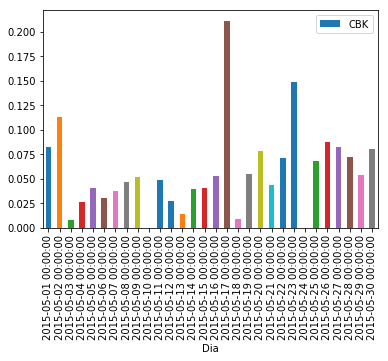

In [38]:
'''
Visualização gráfica da média de chargebacks por dia.
'''

s_train[["Dia","CBK"]].groupby(["Dia"], as_index = False).mean().plot(x ='Dia', y='CBK', kind = 'bar')

<h3>Verificando a média de chargeback nos 4 períodos do dia:</h3>
<p>Uma notável incidência muito maior de chargebacks ocorrem nas madrugadas. Isso é uma surpresa, haja vista que a maioria dos consumidores estão dormindo nesse horário e, portanto, não estão realizando compras no cartão de crédito. Conforme foi visto anteriormente, o número de transações com cartões de crédito na madrugada não chegam nem a 5% do total. Entretanto, como não é possível confirmar com os clientes a legitimidade da compra no momento em que ela é feita de madrugada ( já que os clientes estão dormindo), a saída mais segura seria simplesmente cancelar a compra. Isso explica do porquê temos tanto chargebacks na madrugada.</p>

In [39]:
print(s_train[["faixa_horario","CBK"]].groupby(["faixa_horario"], as_index = False).mean())

  faixa_horario       CBK
0     Madrugada  0.101562
1         Manha  0.032767
2         Noite  0.042007
3         Tarde  0.063783


<h3>Visualização gráfica da quantidade de cashback durante os 4 períodos do dia:</h3>

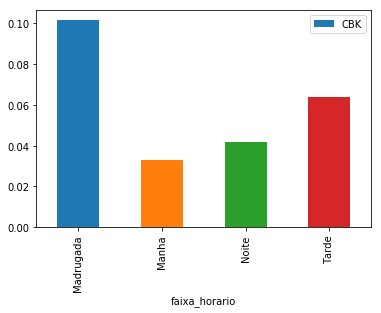

In [40]:
s_train[["faixa_horario","CBK"]].groupby(["faixa_horario"], as_index = False).mean().plot(x ='faixa_horario', y='CBK', kind = 'bar')

<h3>Verificando a quantia em dinheiro de chargebacks nos 4 períodos do dia:</h3>
<p>Como era de se esperar, a maior quantia de chargebacks em dinheiro acontece durante a tarde, durante o horário comercial. Como foi visto no gráfico anterior, apesar da incidência de ocorrências de chargeback ser menor que no período da madrugada, na tarde, os valores em que chargebacks acontecem são bem maiores. </p>
    <p>Algumas inferências podem ser feitas a partir dessa informação. Subentende-se que as pessoas estejam acordadas e/ou disponíveis caso algum problema ocorra em sua compra. E as empresas administradoras do cartão podem entrar em contato com os clientes e esclarecer quaisquer problemas. Evitando assim a incidência de tantos chargebacks. Entretanto, como a maior quantidade de compras relevantes são feitas durante o horário comercial, os chargebacks com os maiores valores em dinheiro acontecem durante esse período.</p>
    


<p>Temos ao todo, um total de:</p>
<ul>
    <li><b>Período da tarde: </b> Por volta de 6,4% de chargebacks em suas transações no período.</li>
    <li><b>Período da Noite: </b> Por volta de 4,2% de chargebacks em suas transações no período.</li>
    <li><b>Período da Manhã: </b> Por volta de 3,3% de chargebacks em suas transações no período.</li>
    <li><b>Período da Madrugada:</b> Por volta de 10,15% de chargebacks em suas transações no período.</li>
</ul>
<p><b>No total temos um chargeback a uma taxa de aproximadamente 5,16% do valor total das transações</b></p>

In [41]:
'''
Quantidade de chargebacks por período do dia.
'''

print(s_train[["faixa_horario","CBK"]].groupby(["faixa_horario"], as_index = False).sum())

  faixa_horario  CBK
0     Madrugada   52
1         Manha   83
2         Noite  144
3         Tarde  289


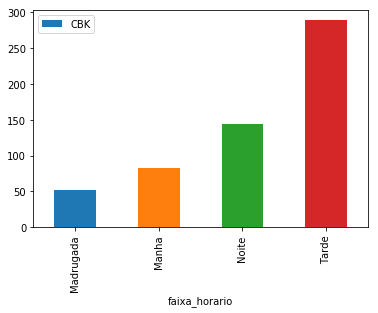

In [42]:
'''
Representação visual da quantidade de chargebacks por período do dia.
'''

s_train[["faixa_horario","CBK"]].groupby(["faixa_horario"], as_index = False).sum().plot(x ='faixa_horario', y='CBK', kind = 'bar')

<h3>Calculando o número de cashbacks por cartão:</h3>
<p>Aqui queremos averiguar quais são os cartões, representados apenas pelos seus 4 dígitos finais que são comuns a muitos cartões, que possuem a maior taxa de chargeback.</p>


In [43]:
'''
Aqui está sendo calculado o número de cashbacks por cartões
'''
cashback_por_cartao = s_train.Cartao.loc[s_train.CBK== 1].value_counts()
len(cashback_por_cartao)

184

In [44]:
'''
Um dicionário está sendo criado aqui com o objetivo de mapear as incidências de cashbacks por 
cartões para todo o dataset, através da função "map"
'''
cashback_por_cartao = cashback_por_cartao.to_dict()

In [45]:
cashback_por_cartao

{7788: 20,
 2711: 20,
 8377: 15,
 2077: 12,
 7228: 12,
 601: 10,
 5160: 10,
 294: 9,
 4021: 9,
 9268: 8,
 1250: 8,
 1353: 8,
 6512: 8,
 6424: 8,
 7796: 7,
 3859: 7,
 2516: 6,
 4984: 6,
 527: 6,
 5947: 6,
 5172: 6,
 5465: 6,
 622: 5,
 8940: 5,
 7897: 5,
 7303: 5,
 1725: 5,
 2413: 5,
 2617: 5,
 8760: 5,
 8766: 5,
 9598: 5,
 3615: 5,
 8901: 5,
 3107: 5,
 5734: 4,
 526: 4,
 4363: 4,
 1720: 4,
 7595: 4,
 9881: 4,
 9632: 4,
 9508: 4,
 4750: 4,
 5768: 4,
 1301: 4,
 1516: 4,
 4360: 4,
 7137: 4,
 5187: 4,
 4291: 4,
 7415: 4,
 7069: 4,
 8246: 4,
 6928: 4,
 1034: 4,
 2033: 4,
 4071: 3,
 9170: 3,
 4008: 3,
 2487: 3,
 5179: 3,
 3646: 3,
 358: 3,
 7524: 3,
 3660: 3,
 3424: 3,
 1623: 3,
 2126: 3,
 116: 3,
 3276: 3,
 6770: 3,
 4302: 3,
 212: 3,
 308: 3,
 3380: 3,
 9014: 3,
 3921: 3,
 8804: 3,
 2659: 3,
 7471: 3,
 936: 2,
 1254: 2,
 6553: 2,
 7601: 2,
 3550: 2,
 299: 2,
 3103: 2,
 7737: 2,
 384: 2,
 5156: 2,
 6263: 2,
 3511: 2,
 1087: 2,
 6461: 2,
 9407: 2,
 6267: 2,
 7159: 2,
 9734: 2,
 7176: 2,
 9152

In [46]:
'''
Aqui estou mapeando todas as incidências de cashback por cartão.
'''
s_train['incidencia_por_cartao'] = s_train['Cartao'].map(cashback_por_cartao)
s_test['incidencia_por_cartao'] = s_test['Cartao'].map(cashback_por_cartao)



In [47]:
s_train.head()

,Dia,Hora,Valor,Cartao,CBK,hora_do_dia,faixa_horario,incidencia_por_cartao
0,2015-05-01,1900-01-01 00:01:54,36.54,2108,0,0,Madrugada,NaN
1,2015-05-01,1900-01-01 00:03:46,36.54,2108,0,0,Madrugada,NaN
2,2015-05-01,1900-01-01 00:08:50,69.00,1239,0,0,Madrugada,NaN
3,2015-05-01,1900-01-01 00:27:00,193.43,1705,0,0,Madrugada,NaN
4,2015-05-01,1900-01-01 01:32:46,132.00,9778,0,1,Madrugada,NaN


In [48]:
s_test.head()

,Dia,Hora,Valor,Cartao,CBK,hora_do_dia,faixa_horario,incidencia_por_cartao
0,2015-06-01,1900-01-01 00:01:54,112.00,5965,NaN,0.0,Madrugada,NaN
1,2015-06-01,1900-01-01 00:03:46,112.00,7350,NaN,0.0,Madrugada,NaN
2,2015-06-01,1900-01-01 00:08:50,18.34,4535,NaN,0.0,Madrugada,NaN
3,2015-06-01,1900-01-01 00:27:00,55.00,5629,NaN,0.0,Madrugada,NaN
4,2015-06-01,1900-01-01 01:32:46,50.00,2077,NaN,1.0,Madrugada,12.0


In [49]:
'''
Como muitos cartões não possuem cashback, esses valores ficarão com valores nulos. O método
abaixo substitui todos os valores nulos da coluna nova para 0.
'''
s_train['incidencia_por_cartao'].fillna(0, inplace=True)
s_test['incidencia_por_cartao'].fillna(0, inplace=True)

In [50]:
s_train['incidencia_por_cartao'] = s_train['incidencia_por_cartao'].astype(int)
s_test['incidencia_por_cartao'] = s_test['incidencia_por_cartao'].astype(int)

In [51]:
s_train.dtypes

Dia                      datetime64[ns]
Hora                     datetime64[ns]
Valor                           float64
Cartao                            int32
CBK                               int64
hora_do_dia                       int64
faixa_horario                    object
incidencia_por_cartao             int32
dtype: object

<h1>Padronizando a coluna "incidencia_por_cartao":</h1>
<p>Abaixo está sendo criada uma função que tem como objetivo qualificar um determinado cartão como tendo muito risco de ocorrer um chargeback ou pouco risco. Essa função então irá ser aplicada a todas as linhas do dataset, qualificando os cartões em uma nova coluna chamada "qualificacao_cartoes". É uma tática parecida do que foi feita ao dividir as horas do dia por períodos.</p>
<p>Esse processo será feito tanto no dataframe de treino quanto no de teste. </p>

<h4>Padronizando dataset de treino.</h4>

In [52]:
'''
Aqui é a função criada para qualificar os cartões em relação a incidência de chargebacks
'''

incidencia_cartoes = []

for i in s_train['incidencia_por_cartao']:
    if i == 0:
        incidencia_cartoes.append('sem_incidencias')
    if i > 0 and i <= 5:
        incidencia_cartoes.append('incidencia_baixa')
    elif i >= 6 and i <= 10:
        incidencia_cartoes.append('incidencia_moderada')
    elif i >= 11 and i <=15:
        incidencia_cartoes.append('incidencia_alta')
    elif i >= 16 and i <=20:
        incidencia_cartoes.append('incidencia_muito_alta')
        
s_train['qualificacao_cartoes'] = incidencia_cartoes


<h4>Padronizando dataset de teste.</h4>

In [53]:
incidencia_cartoes = []

for i in s_test['incidencia_por_cartao']:
    if i == 0:
        incidencia_cartoes.append('sem_incidencias')
    if i > 0 and i <= 5:
        incidencia_cartoes.append('incidencia_baixa')
    elif i >= 6 and i <= 10:
        incidencia_cartoes.append('incidencia_moderada')
    elif i >= 11 and i <=15:
        incidencia_cartoes.append('incidencia_alta')
    elif i >= 16 and i <=20:
        incidencia_cartoes.append('incidencia_muito_alta')
        
s_test['qualificacao_cartoes'] = incidencia_cartoes


<h3>Incidência de chargebacks por cartões:</h3>
<p>Como dito anteriormente, temos algo em torno de 5,16% de chargebacks do total de transações com cartões. Isso significa que temos muito mais cartões sem nenhuma incidência de chargebacks. Abaixo, temos a representação visual disso.</p>

In [54]:
s_train['qualificacao_cartoes'].value_counts()

sem_incidencias          10208
incidencia_baixa           567
incidencia_moderada        146
incidencia_muito_alta       43
incidencia_alta             40
Name: qualificacao_cartoes, dtype: int64

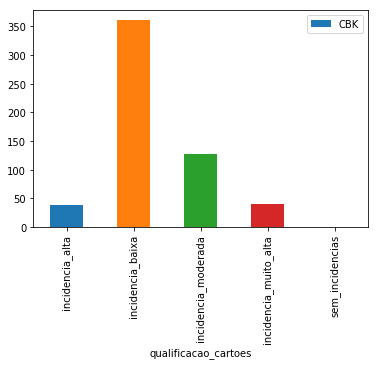

In [55]:
s_train[["qualificacao_cartoes","CBK"]].groupby(["qualificacao_cartoes"], as_index = False).sum().plot(x ='qualificacao_cartoes', y='CBK', kind = 'bar')

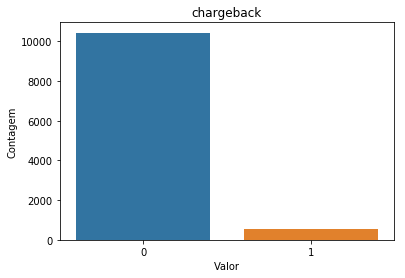

Proporção de chargeback entre todos os cartões:
0    94.838241
1     5.161759
Name: CBK, dtype: float64


In [56]:

# Proporção de cashback entre todos os cartões
fig, ax = plt.subplots()
sns.countplot('CBK', data=s_train, ax=ax)
ax.set_title("chargeback")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção de chargeback entre todos os cartões:")
print((s_train['CBK'].value_counts() / s_train.shape[0] )*100)

<h3>Deletando colunas desnecessárias:</h3>
<p>Algumas colunas que foram criadas ao longo do projeto, não são mais necessárias. As mesmas serão deletadas tanto do dataframe de treino quanto no de teste.</p>

In [57]:
'''
Deletando o resto das colunas desnecessárias de teste
'''
s_test.drop(['hora_do_dia', 'incidencia_por_cartao'], axis = 1, inplace = True)


In [58]:
'''
Deletando o resto das colunas desnecessárias de treino
'''
s_train.drop(['hora_do_dia', 'incidencia_por_cartao'], axis = 1, inplace = True)



In [59]:
s_train.head()

,Dia,Hora,Valor,Cartao,CBK,faixa_horario,qualificacao_cartoes
0,2015-05-01,1900-01-01 00:01:54,36.54,2108,0,Madrugada,sem_incidencias
1,2015-05-01,1900-01-01 00:03:46,36.54,2108,0,Madrugada,sem_incidencias
2,2015-05-01,1900-01-01 00:08:50,69.00,1239,0,Madrugada,sem_incidencias
3,2015-05-01,1900-01-01 00:27:00,193.43,1705,0,Madrugada,sem_incidencias
4,2015-05-01,1900-01-01 01:32:46,132.00,9778,0,Madrugada,sem_incidencias


In [60]:
s_test.head()

,Dia,Hora,Valor,Cartao,CBK,faixa_horario,qualificacao_cartoes
0,2015-06-01,1900-01-01 00:01:54,112.00,5965,NaN,Madrugada,sem_incidencias
1,2015-06-01,1900-01-01 00:03:46,112.00,7350,NaN,Madrugada,sem_incidencias
2,2015-06-01,1900-01-01 00:08:50,18.34,4535,NaN,Madrugada,sem_incidencias
3,2015-06-01,1900-01-01 00:27:00,55.00,5629,NaN,Madrugada,sem_incidencias
4,2015-06-01,1900-01-01 01:32:46,50.00,2077,NaN,Madrugada,incidencia_alta


In [61]:
treino = s_train.copy()
teste = s_test.copy()

<h3>Reorganizando as colunas</h3>
<p>Abaixo, as colunas estão tendo suas posições reordenadas. Isso será importante mais a frente</p>

In [62]:
'''
Mudando a ordem das colunas para deixar a variável alvo na frente.
'''
treino = treino.reindex(columns=['CBK', 'Dia', 'Hora', 'Valor', 'Cartao', 'faixa_horario', 'qualificacao_cartoes'])


In [63]:
'''
Mudando a ordem das colunas.
'''
teste = teste.reindex(columns=['CBK', 'Dia', 'Hora', 'Valor', 'Cartao', 'faixa_horario', 'qualificacao_cartoes'])


In [64]:
treino.head()

,CBK,Dia,Hora,Valor,Cartao,faixa_horario,qualificacao_cartoes
0,0,2015-05-01,1900-01-01 00:01:54,36.54,2108,Madrugada,sem_incidencias
1,0,2015-05-01,1900-01-01 00:03:46,36.54,2108,Madrugada,sem_incidencias
2,0,2015-05-01,1900-01-01 00:08:50,69.00,1239,Madrugada,sem_incidencias
3,0,2015-05-01,1900-01-01 00:27:00,193.43,1705,Madrugada,sem_incidencias
4,0,2015-05-01,1900-01-01 01:32:46,132.00,9778,Madrugada,sem_incidencias


In [65]:
teste.head()

,CBK,Dia,Hora,Valor,Cartao,faixa_horario,qualificacao_cartoes
0,NaN,2015-06-01,1900-01-01 00:01:54,112.00,5965,Madrugada,sem_incidencias
1,NaN,2015-06-01,1900-01-01 00:03:46,112.00,7350,Madrugada,sem_incidencias
2,NaN,2015-06-01,1900-01-01 00:08:50,18.34,4535,Madrugada,sem_incidencias
3,NaN,2015-06-01,1900-01-01 00:27:00,55.00,5629,Madrugada,sem_incidencias
4,NaN,2015-06-01,1900-01-01 01:32:46,50.00,2077,Madrugada,incidencia_alta


<h1>Verificando a correlação entre as variáveis antes de testá-las:</h1>
    <p>Abaixo as features serão correlacionadas entre si, inclusive com a variável alvo. O objetivo é encontrar quais variáveis exercem maior influência na vitória:</p>

<h4>Para verificar a correlação entre as features, primeiro é necessário transformar todas as variáveis em valores numéricos. Como isso será feito somente para verificar a correlação, irei criar uma variável chamada "train_corr" somente com esse propósito.</h4>

In [66]:
train_corr = treino.copy()

In [67]:
'''
Criando uma função de padronização que transforma as faixas de horário em valores numéricos.
'''
def padronizar_faixa_horario(faixa_horario):
    if faixa_horario == "Madrugada":
        return 1
    elif faixa_horario == "Manha":
        return 2
    elif faixa_horario == "Tarde":
        return 3
    elif faixa_horario == "Noite":
        return 4
    
train_corr["faixa_horario"] = train_corr["faixa_horario"].map(padronizar_faixa_horario)


In [68]:
train_corr.head()

,CBK,Dia,Hora,Valor,Cartao,faixa_horario,qualificacao_cartoes
0,0,2015-05-01,1900-01-01 00:01:54,36.54,2108,1,sem_incidencias
1,0,2015-05-01,1900-01-01 00:03:46,36.54,2108,1,sem_incidencias
2,0,2015-05-01,1900-01-01 00:08:50,69.00,1239,1,sem_incidencias
3,0,2015-05-01,1900-01-01 00:27:00,193.43,1705,1,sem_incidencias
4,0,2015-05-01,1900-01-01 01:32:46,132.00,9778,1,sem_incidencias


In [69]:
'''
Criando uma função de padronização que transforma as taxas de incidência de ocorrências de chargeback
valores numéricos.
'''

def padronizar_incidencia(incidencia):
    if incidencia == "sem_incidencias":
        return 1
    elif incidencia == "incidencia_baixa":
        return 2
    elif incidencia == "incidencia_moderada":
        return 3
    elif incidencia == "incidencia_alta":
        return 4
    elif incidencia == 'incidencia_muito_alta':
        return 5
    
train_corr["qualificacao_cartoes"] = train_corr["qualificacao_cartoes"].map(padronizar_incidencia)

In [70]:
train_corr.head()

,CBK,Dia,Hora,Valor,Cartao,faixa_horario,qualificacao_cartoes
0,0,2015-05-01,1900-01-01 00:01:54,36.54,2108,1,1
1,0,2015-05-01,1900-01-01 00:03:46,36.54,2108,1,1
2,0,2015-05-01,1900-01-01 00:08:50,69.00,1239,1,1
3,0,2015-05-01,1900-01-01 00:27:00,193.43,1705,1,1
4,0,2015-05-01,1900-01-01 01:32:46,132.00,9778,1,1


In [71]:
'''
Somente os itens que serão usados no treinamento serão correlacionados.
'''
fields_to_correlate = 'CBK Dia Hora Valor Cartao faixa_horario qualificacao_cartoes'.split()

In [72]:
'''
Criando a função de correlação entre as features.
'''
def correlation_in_league():
    train_corr.replace(' ', np.nan, inplace=True)
    corr = train_corr[fields_to_correlate].corr()
    print(corr.round(2))

correlation_in_league()

                       CBK  Valor  Cartao  faixa_horario  qualificacao_cartoes
CBK                   1.00   0.09   -0.01          -0.02                  0.79
Valor                 0.09   1.00    0.02          -0.01                  0.06
Cartao               -0.01   0.02    1.00           0.01                 -0.00
faixa_horario        -0.02  -0.01    0.01           1.00                 -0.01
qualificacao_cartoes  0.79   0.06   -0.00          -0.01                  1.00


<h3>Criação do mapa de calor:</h3>
<p>O mapa de calor abaixo é responsável por identificar correlações entre as variáveis</p>

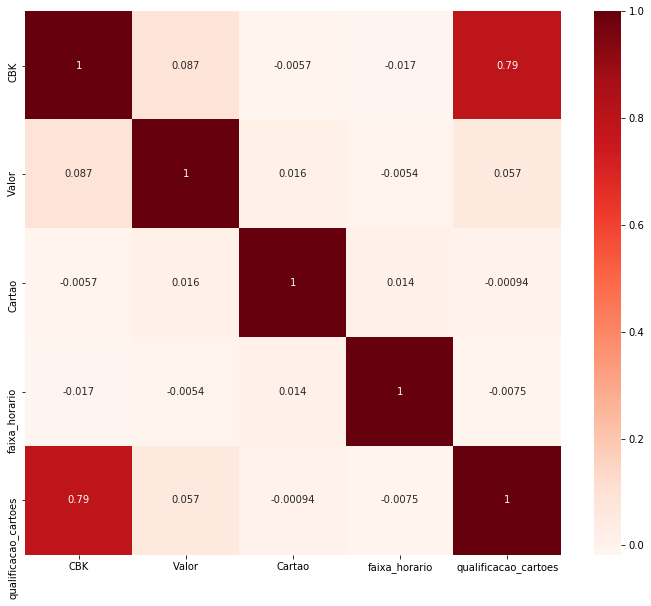

In [73]:
'''
O mapa de calor abaixo mostra a correlação entre a variável alvo (CBK) e as outras features.
'''

plt.figure(figsize=(12,10))
corr = train_corr[fields_to_correlate].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

<h1>Conclusões sobre correlacionamentos:</h1>
<p>Como era de se esperar a variável referente a qualificação dos cartões tem altíssima correlação com a quantidade de chargebacks. Isso porque essa variável calcula a quantidade de chargebacks que cada cartão obteve e atribui uma nota a esse cálculo. Quanto mais alto a nota, mais chargebacks um determinado cartão obteve. E essa variável representa justamente isso.</p>

<h1>Hora de Parametrizar os valores categóricos.</h1>
<p>Para rodar o dataframe nos algoritmos de modelos preditivos, é necessário que todas as features sejam numéricas. Portanto, irei usar um método chamado "OneHotEncoder", que converterá as colunas categóricas em um conjunto de colunas numéricas.</p>

In [74]:
treino.dtypes

CBK                              int64
Dia                     datetime64[ns]
Hora                    datetime64[ns]
Valor                          float64
Cartao                           int32
faixa_horario                   object
qualificacao_cartoes            object
dtype: object

<h4>Padronizando dataframe de treino</h4>

In [75]:
'''
Aqui o método OneHotEncoder está sendo usado. Um novo dataframe está sendo criado somente com 
features numéricas. Esse novo dataframe chama-se train_ML
'''
import category_encoders as ce

ce_ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
train_ML = ce_ohe.fit_transform(treino)

In [76]:
train_ML.head()

,CBK,Dia,Hora,Valor,Cartao,faixa_horario_Madrugada,faixa_horario_Manha,faixa_horario_Tarde,faixa_horario_Noite,qualificacao_cartoes_sem_incidencias,qualificacao_cartoes_incidencia_baixa,qualificacao_cartoes_incidencia_moderada,qualificacao_cartoes_incidencia_alta,qualificacao_cartoes_incidencia_muito_alta
0,0,2015-05-01,1900-01-01 00:01:54,36.54,2108,1,0,0,0,1,0,0,0,0
1,0,2015-05-01,1900-01-01 00:03:46,36.54,2108,1,0,0,0,1,0,0,0,0
2,0,2015-05-01,1900-01-01 00:08:50,69.00,1239,1,0,0,0,1,0,0,0,0
3,0,2015-05-01,1900-01-01 00:27:00,193.43,1705,1,0,0,0,1,0,0,0,0
4,0,2015-05-01,1900-01-01 01:32:46,132.00,9778,1,0,0,0,1,0,0,0,0


In [77]:
train_ML.shape

(11004, 14)

<h4>Padronizando dataframe de teste</h4>

In [78]:
'''
Para padronizar as colunas do dataframe de teste, primeiro é necessário eliminar as colunas nulas:
'''
del teste['CBK']

In [79]:
teste.head()

,Dia,Hora,Valor,Cartao,faixa_horario,qualificacao_cartoes
0,2015-06-01,1900-01-01 00:01:54,112.00,5965,Madrugada,sem_incidencias
1,2015-06-01,1900-01-01 00:03:46,112.00,7350,Madrugada,sem_incidencias
2,2015-06-01,1900-01-01 00:08:50,18.34,4535,Madrugada,sem_incidencias
3,2015-06-01,1900-01-01 00:27:00,55.00,5629,Madrugada,sem_incidencias
4,2015-06-01,1900-01-01 01:32:46,50.00,2077,Madrugada,incidencia_alta


In [80]:
'''
Aqui o método OneHotEncoder está sendo usado. Um novo dataframe está sendo criado somente com 
features numéricas. Esse novo dataframe chama-se test_ML
'''
import category_encoders as ce

tce_ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
test_ML = tce_ohe.fit_transform(teste)

In [81]:
test_ML.head()

,Dia,Hora,Valor,Cartao,faixa_horario_Madrugada,faixa_horario_Manha,faixa_horario_Tarde,faixa_horario_Noite,qualificacao_cartoes_sem_incidencias,qualificacao_cartoes_incidencia_alta,qualificacao_cartoes_incidencia_baixa,qualificacao_cartoes_incidencia_muito_alta,qualificacao_cartoes_incidencia_moderada
0,2015-06-01,1900-01-01 00:01:54,112.00,5965,1,0,0,0,1,0,0,0,0
1,2015-06-01,1900-01-01 00:03:46,112.00,7350,1,0,0,0,1,0,0,0,0
2,2015-06-01,1900-01-01 00:08:50,18.34,4535,1,0,0,0,1,0,0,0,0
3,2015-06-01,1900-01-01 00:27:00,55.00,5629,1,0,0,0,1,0,0,0,0
4,2015-06-01,1900-01-01 01:32:46,50.00,2077,1,0,0,0,0,1,0,0,0


<h1>Hora de testar alguns algoritmos:</h1>
<p>Depois de limpar os dados e transformá-los em valores numéricos, é hora de testar alguns algoritmos preditivos com o objetivo de encontrar o algoritmo que seja capaz de prever chargebacks com maior acurácia.</p>

In [82]:
'''
Essas serão as variáveis que serão passadas aos modelos preditivos para testes. Em y, temos apenas
a variável alvo (CBK), e em X temos todas as outras colunas.
'''
X = np.array(train_ML.iloc[:,3:])
y = np.array(train_ML['CBK'])


<h3>Método de testes do algoritmo "K-fold":</h3>
<p>Os testes abaixo são apenas estimativas. O treinamento será feito depois. Os testes serão feitos com uma técnica chamada "K-fold" que divide o dataframe em k pedaços, sendo 1 pedaço de teste e os outros de treino. Esse teste é realizado k vezes, calculando a média de sua acurácia no final. O K-fold está sendo utilizado com 4 algoritmos diferentes para ser avalidado. </p>

<h3>Motivo da escolha dos algoritmos</h3>
<p>Como pode ser notado logo abaixo, 4 algoritmos foram escolhidos: Random Forest, KNN, Decision Tree e Naive Bayes. Mas suas escolhas não são aleatórias. Foram escolhidos os algoritmos mais usados da classe de algortimos conhecida como algoritmos de classificação. Os algoritmos da classe de Regressão foram evitados porque o objetivo desse caso de estudo é prever se uma determinada compra sofrerá um cashback ou não. Ou seja, é uma variável booleana e discreta. Os algoritmos de Regressão trabalham melhores com outputs contínuos. Como a previsão do preço de uma casa por exemplo.</p>

In [ ]:

from sklearn import model_selection
from sklearn.model_selection import cross_val_score


'''
Aqui os modelos preditivos estão sendo testados em função de sua performance EM TODAS AS VARIÁVES
DE INTERESSE. No final, somente 1 algoritmo preditivo será escolhido para ser usado. O método utilizado
é dividir o dataset em 10 pedaços e calcular a acurácia de cada pedaço. No final calcularemos média 
da acurácia desses 10 pedaços. Quanto maior a média final, melhor o modelo preditivo. Importante 
salientar que o treinamento não está sendo feito aqui. Apenas estimativas de quais modelos funcionam
melhor. 

'''

models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(random_state = 42)))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier(random_state = 42)))
models.append(('NAIVE_BAYES', GaussianNB()))

# evaluate each model in turn
results = []
names = []
n_folds = 10


for name, model in models:
    kf = KFold(n_folds, shuffle=True, random_state = 42)
    hit_rate = 0
    for training_lines, testing_lines in kf.split(X,y):
       
        kf = model_selection.KFold(10, shuffle=True, random_state = 42)
        X_train, X_test = X[training_lines], X[testing_lines]
        y_train, y_test = y[training_lines], y[testing_lines]

        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))

        hit_rate += cv_results.mean()
        
    final_accuracy = hit_rate/10   
    print("Média das 10 acurácias: ",final_accuracy)
    print()

<h1>Tunando os algoritmos:</h1>
<p>Os resultados das acurácias acima são muito bons. Mas são apenas estimativas. Os modelos sequer foram treinados ainda. Mas antes de escolher um algoritmo, é importante tuná-los. Ou seja, usar os algoritmos acima com seus melhores parâmetros. E a maneira mais eficiente de se encontrar os melhores parâmetros para cada algoritmo, é atravéz de um método conhecido como "GridSearch", que faz exatamente isso.</p>
<p>Aqui os algoritmos estão sendo otimizados. O objetivo é procurar seus melhores parâmetros para averiguar se podemos ter alguma melhora na acurácia ou não.</p>
<p><b>Primeiramente serão treinados os modelos sem nenhuma otimização. Depois os modelos serão otimizados e suas acurácias serão apuradas.</b></p>

In [ ]:
train_ML.head()

In [ ]:
'''
Essas duas features não precisam mais serem consideradas no dataframe. Isso porque as informações
relevantes que podiam ser extraídas dessas features ( período do dia) já foi calculada. Verificamos
também que a feature "Dia" não exerce grandes influências sobre o cálculo dos chargebacks. Portanto, 
ele também será deletado.
'''

del train_ML['Dia']
del train_ML['Hora']

In [ ]:
test.head()

In [ ]:
train_ML.dtypes

In [ ]:
'''
Essas serão as variáveis que serão passadas aos algoritmos preditivos para tunagens. Na variável 
"target", temos apenas a variável alvo (CBK), e em "features" temos todas as outras colunas.
'''

features = np.array(train_ML.iloc[:,1:])
target = np.array(train_ML['CBK'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_ML, target, test_size=0.3, random_state=42)

<h3>Tunando Random Forest.</h3>
<p>É um algoritmo de aprendizado de classificação. Operam construindo uma infinidade de árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes ou a previsão média das árvores individuais.</p>

In [ ]:
param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose = 1, n_jobs = -1)
CV_rfc.fit(x_train, y_train)


In [ ]:
CV_rfc.best_params_

<h3>Tunando Decision Tree Classifier</h3>
<p>Uma árvore de decisão é uma representação de uma tabela de decisão sob a forma de uma árvore, porém pode haver outras aplicações. Tem a mesma utilidade da tabela de decisão.</p>

In [ ]:
param_grid = { 
    'max_depth': [2, 5, 10, 50, 80, 90, 100, 110],
    'criterion' :['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
    'min_impurity_decrease' : [0.1, 0.3, 0.5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier(random_state=42)
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, verbose = 1, n_jobs = -1)
CV_dtc.fit(x_train, y_train)

In [ ]:
CV_dtc.best_params_

<h3>Tunando k-nearest neighbor</h3>
<p>É um dos muitos algoritmos ( de aprendizagem supervisionada ) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.</p>

In [ ]:
param_grid = { 
    'n_neighbors' : [2, 5, 10, 20, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 50],
    'p': [1, 2, 5],
    'metric': ['minkowski', 'euclidean']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5, verbose = 1, n_jobs = -1)
CV_knn.fit(x_train, y_train)

In [ ]:
CV_knn.best_params_

In [ ]:
test.head()

In [ ]:
train_ML.head()

<h1>Testando as acurácias da previsão</h1>
<p>Todos os testes otimizados ou não, foram feitos considerando uma divisão do dataset feita pelo método K-fold em 10 pedaços</p>

In [ ]:
features = np.array(train_ML.iloc[:,1:])
target = np.array(train_ML['CBK'])



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

'''
Aqui, de fato o dataset está sendo treinado de acordo com a divisão feita anteriormente feita 
anteriormente entre "features" e variáveis "target" (CBK). Existem vários modelos abaixo, mas somente
o modelo que se saiu melhor durante os testes do cross_validation_score ( melhor acurácia), será 
usado. 
''' 
resultados = []
n_folds = 10
k_folds = KFold(n_folds, shuffle=True, random_state = 1)
scores_teste = 0
scores_treino = 0



for linhas_treino, linhas_teste in k_folds.split(features):
    XTreino, XTeste = features[linhas_treino], features[linhas_teste]
    yTreino, yTeste = target[linhas_treino], target[linhas_teste]
    
    # Aqui o melhor modelo será escolhido para treinar as variáveis.    
    modelr = RandomForestClassifier(
                                    random_state = 42,
                                    n_jobs = -1, 
                                    bootstrap = False, 
                                    criterion = 'entropy',
                                    max_depth = 10, 
                                    max_features = 0.1,
                                    #min_samples_leaf = 3, 
                                    #min_samples_split = 5, 
                                    n_estimators = 25
                                   )
    #modelk = KNeighborsClassifier(
                                    #algorithm = 'auto', 
                                    #leaf_size = 10, 
                                    #metric = 'minkowski',
                                    #n_neighbors = 30, 
                                    #p = 1, 
                                    #weights = 'distance')
    #modeld = DecisionTreeClassifier(random_state = 42,
                                    #criterion = 'gini', 
                                    #max_depth = 2, 
                                    #max_features = 'auto', 
                                    #min_impurity_decrease = 0.1, 
                                    #min_samples_leaf = 3,
                                    #min_samples_split = 8, 
                                    #min_weight_fraction_leaf = 0.1,
                                    #splitter = 'best', 
                                   #)
    #modelg = GaussianNB()
        
    
    modelr.fit(XTreino, yTreino)
    previsoes = modelr.predict(XTeste)
    resultados.append(accuracy_score(yTeste, previsoes))
    scores_treino += modelr.score(XTreino, yTreino)
    scores_teste += modelr.score(XTeste, yTeste)
    

    
#Calcula a acurácia    
    
print("Acurácias de cada pedaço dividido pelo dataset =>")
print(resultados)
print("\nMédia de todas as acurácias: ", np.mean(resultados))
print()
print("Média da pontuação de validação do modelo de treino: ", scores_treino/n_folds)
print("Média da pontuação de validação do modelo de teste: ", scores_teste/n_folds)



<h3>Sem tunagem</h3>

In [ ]:
'''
RESULTADO RANDOM FOREST
'''
Média de todas as acurácias:  0.9843693693693694


In [ ]:
'''
RESULTADO DECISION TREE
'''
Média de todas as acurácias:  0.9855503685503685


In [ ]:
'''
RESULTADO KNN
'''
Média de todas as acurácias:  0.9506527436527438


In [ ]:
'''
RESULTADO NAIVE BAYES
'''
Média de todas as acurácias:  0.979186732186732


<h3>Com tunagem</h3>

In [ ]:
'''
RESULTADO RANDOM FOREST
'''
Média de todas as acurácias:  0.9844595821980018


In [ ]:
'''
RESULTADO DECISION TREE
'''
Média de todas as acurácias:  0.9483832053505077


In [ ]:
'''
RESULTADO KNN
'''
Média de todas as acurácias:  0.9808250350920652


<h3>Não existe tunagem para o algoritmo Naive Bayes pois ele não possui parâmetros para tunar.</h3>

<h1>Resultados:</h1>
<p>Após ser realizado os testes com os 4 algoritmos e depois de otimizá-los, algumas observações podem ser feitas:</p>
<p>1. As otimizações foram ineficientes. Isso ocorreu provavelmente porque o modelos criados pelos algoritmos sem tunar já estavam próximos de sua eficiência máxima. Ao tunar os algoritmos, quase todos tiveram desempenho inferior. Isso é um caso clássico de overfitting;</p>
<p>2. Overfitting ocorre quando os algoritmos decoram todas as respostas, mas sem aprender nada. Os algoritmos acabam apresentando um bom resultado nos datasets de treino, mas não conseguem generalizar esses resultados para novos dados;</p>
<p>3. O único algoritmo que obteu alguma melhora com a tunagem foi o Random Forest e mesmo assim, foi mínima;</p>
<p>4. O algoritmo que apresentou o melhor resultado foi o Decision Tree sem tunagem. Seguido logo depois do Random Forest com tunagem;</p>
<p>5. Apesar do Decision Tree ter apresentado um resultado melhor, o algoritmo escolhido será o Random Forest. Primeiro porque ele apresenta uma performance melhor quando tunado, segundo porque o Random Forest nada mais é do que um conjunto de Decisions Trees.</p>

<h1>Aplicando o Random Forest tunado:</h1>

In [83]:
del train_ML['Dia']
del train_ML['Hora']

del test_ML['Dia']
del test_ML['Hora']

In [84]:
features = np.array(train_ML.iloc[:,1:])
target = np.array(train_ML['CBK'])


In [85]:
'''
Aplicando o modelo Random Forest
'''
forest = RandomForestClassifier(
                                    random_state = 42,
                                    n_jobs = -1, 
                                    bootstrap = False, 
                                    criterion = 'entropy',
                                    max_depth = 10, 
                                    max_features = 0.1,
                                    n_estimators = 25
                                )


In [86]:
forest.fit(features, target)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=10, max_features=0.1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [87]:
train_ML.head()

,CBK,Valor,Cartao,faixa_horario_Madrugada,faixa_horario_Manha,faixa_horario_Tarde,faixa_horario_Noite,qualificacao_cartoes_sem_incidencias,qualificacao_cartoes_incidencia_baixa,qualificacao_cartoes_incidencia_moderada,qualificacao_cartoes_incidencia_alta,qualificacao_cartoes_incidencia_muito_alta
0,0,36.54,2108,1,0,0,0,1,0,0,0,0
1,0,36.54,2108,1,0,0,0,1,0,0,0,0
2,0,69.00,1239,1,0,0,0,1,0,0,0,0
3,0,193.43,1705,1,0,0,0,1,0,0,0,0
4,0,132.00,9778,1,0,0,0,1,0,0,0,0


In [88]:
test_ML.head()

,Valor,Cartao,faixa_horario_Madrugada,faixa_horario_Manha,faixa_horario_Tarde,faixa_horario_Noite,qualificacao_cartoes_sem_incidencias,qualificacao_cartoes_incidencia_alta,qualificacao_cartoes_incidencia_baixa,qualificacao_cartoes_incidencia_muito_alta,qualificacao_cartoes_incidencia_moderada
0,112.00,5965,1,0,0,0,1,0,0,0,0
1,112.00,7350,1,0,0,0,1,0,0,0,0
2,18.34,4535,1,0,0,0,1,0,0,0,0
3,55.00,5629,1,0,0,0,1,0,0,0,0
4,50.00,2077,1,0,0,0,0,1,0,0,0


In [89]:
train_ML.shape

(11004, 12)

In [90]:
test_ML.shape

(11820, 11)

In [91]:
train_ML.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10994, 10995, 10996, 10997, 10998, 10999, 11000, 11001, 11002,
            11003],
           dtype='int64', length=11004)

In [92]:
test_ML.index

RangeIndex(start=0, stop=11820, step=1)

<h3>Fazendo previsões no dataframe de teste:</h3>
<p>Abaixo está sendo criado a coluna de CBK no dataframe de teste, que contém a previsão relacionado às possibilidades de chargeback ou não dado cada transação com cartão de crédito.</p>

In [93]:
'''
Preparando o dataset de teste para receber as previsões de chargeback
'''

test_ML['CBK'] = forest.predict(test_ML)


In [94]:
test_ML['CBK'].value_counts()

0    11680
1      140
Name: CBK, dtype: int64

In [94]:
test_ML.shape

(11820, 12)

In [95]:
test.shape

(11820, 5)

<h1>Conclusão:</h1>
<p>O modelo preditivo foi criado com sucesso. E já consegue ser aplicado a dados futuros. Como aqueles presentes no dataframe de teste. Mas para fins de apresentação e posterior consulta em um banco de dados, as previsões obtidas precisam ser apresentadas no dataframe de teste original, que segundo a imagem acima, contém as colunas de chargerbacks nulas. Queremos que as previsões do modelo feitas no dataframe de teste modificado(test_ML) preencham a coluna CBK do dataset de teste original.  Para realizar essa tarefa, a seguinte função está sendo feita abaixo</p>

In [95]:

test.CBK = np.where(test.CBK.isnull(), test_ML.CBK, test.CBK)


In [96]:
test.head()

,Dia,Hora,Valor,Cartao,CBK
0,2015-06-01,00:02:25,112.00,541555******5965,0.0
1,2015-06-01,00:30:45,112.00,406669******7350,0.0
2,2015-06-01,00:43:20,18.34,541187******4535,0.0
3,2015-06-01,00:46:46,55.00,554927******5629,0.0
4,2015-06-01,00:47:50,50.00,498407******2077,0.0


In [97]:
test['CBK'].value_counts()

0.0    11680
1.0      140
Name: CBK, dtype: int64

In [98]:
test_ML.head()

,Valor,Cartao,faixa_horario_Madrugada,faixa_horario_Manha,faixa_horario_Tarde,faixa_horario_Noite,qualificacao_cartoes_sem_incidencias,qualificacao_cartoes_incidencia_alta,qualificacao_cartoes_incidencia_baixa,qualificacao_cartoes_incidencia_muito_alta,qualificacao_cartoes_incidencia_moderada,CBK
0,112.00,5965,1,0,0,0,1,0,0,0,0,0
1,112.00,7350,1,0,0,0,1,0,0,0,0,0
2,18.34,4535,1,0,0,0,1,0,0,0,0,0
3,55.00,5629,1,0,0,0,1,0,0,0,0,0
4,50.00,2077,1,0,0,0,0,1,0,0,0,0


In [98]:
test['TransactionID'] = test.index

In [99]:
test.head()

,Dia,Hora,Valor,Cartao,CBK,TransactionID
0,2015-06-01,00:02:25,112.00,541555******5965,0.0,0
1,2015-06-01,00:30:45,112.00,406669******7350,0.0,1
2,2015-06-01,00:43:20,18.34,541187******4535,0.0,2
3,2015-06-01,00:46:46,55.00,554927******5629,0.0,3
4,2015-06-01,00:47:50,50.00,498407******2077,0.0,4


<h3>Criação de uma planilha com os resultados:</h3>
<p>Abaixo está sendo criada uma nova planilha chamada "previsoes_stone.csv". Essa planilha contém os mesmos dados do dataframe de teste original (aba 2), mas com sua coluna  "CBK",  que contém previsões de chargebacks de acordo com cada transação com cartão de crédito.</p>

In [101]:
test.to_csv('previsoes_stone.csv', index = False)

In [100]:
test.to_excel('previsoes_stone.xlsx', index = False)

In [100]:
previsoes = pd.read_excel('previsoes_stone.xlsx')

#Função necessária para mostrar todas as linhas e colunas do dataset sem truncá-las
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [101]:
previsoes.head()

,Dia,Hora,Valor,Cartao,CBK
0,2015-06-01,00:02:25,112.00,541555******5965,0
1,2015-06-01,00:30:45,112.00,406669******7350,0
2,2015-06-01,00:43:20,18.34,541187******4535,0
3,2015-06-01,00:46:46,55.00,554927******5629,0
4,2015-06-01,00:47:50,50.00,498407******2077,0


<h1>SQL QUERIES:</h1>
<p>Abaixo encontram-se as queries solicitadas na parte 2 do problema.</p>

<h3>Tarefa 1:</h3>
<p>Realizar uma consulta utilizando as duas tabelas disponibilizadas, cujo objetivo é gerar saída que seja igual a planilha apresentada na primeira tarefa com os seus chargebacks.</p>
<p><b>Problemas:</b></p>
<p>Não é possível recriar uma consulta que retorne exatamente os mesmos resultados existentes  na planilha da tarefa anterior. A razão para isso é porque não existe a coluna "Hora" (existente na primeira planilha) em nenhuma das duas tabelas disponibilizadas para essa tarefa.</p>

In [ ]:
'''
A lógica por trás dessa tarefa é juntar as duas tabelas através dos seus IDs. Se a coluna TransactionId
da  tabela Chargeback for igual a coluna ID da tabela Transactions, significa que nessa linha, temos
um chargeback. Do contrário, não. Com a técnica "case" é criado uma nova coluna e adicionado os valores
0 e 1 encontrados.
'''

SELECT T.TransactionDate as Dia, T.Amount as Valor, T.CardNumber as Cartao,
    CASE 
        WHEN C.TransactionId == T.Id THEN 1
        WHEN C.TransactionId != T.Id THEN 0
    END as CBK
FROM Transactions AS T 
JOIN Chargeback AS C ON C.TransactionId = T.Id


<h3>Tarefa 2:</h3>
<p>Faça uma query que retorna a quantidade e a soma das transações que retornaram chargeback</p>


In [ ]:
'''
A solução abaixo consiste em usar as funções "Count" que retorna o número de ocorrências (linhas) da
coluna desejada e a Sum que retorna a soma dos valores da coluna numérica desejada.
'''

SELECT COUNT(T.Amount) as QTD_CHARGEBACKS, SUM(T.Amount) as SOMA_CHARGEBACKS 
CASE 
        WHEN C.TransactionId == T.Id THEN 1
        WHEN C.TransactionId != T.Id THEN 0
    END as CBK
FROM Transactions AS T 
JOIN Chargeback AS C ON C.TransactionId = T.Id
WHERE CBK == 1

<h3>Tarefa 3:</h3>
<p>Faça uma query que retorna o índice de chargeback em quantidade e em valor. (Índice = Chargeback/Vendas)</p>

In [ ]:
'''
A solução abaixo consiste em usar as funções SUM e COUNT, realizando operações matemáticas diretamente
no Select. A operação matemática realizada está na própria questão. 
'''

SELECT COUNT(T.CBK)/COUNT(T.Amount) as idx_chargeback_qtd, 
       COUNT(T.CBK)/SUM(T.Amount) as idx_chargeback_sum
CASE 
        WHEN C.TransactionId == T.Id THEN 1
        WHEN C.TransactionId != T.Id THEN 0
    END as CBK
FROM Transactions AS T 
JOIN Chargeback AS C ON C.TransactionId = T.Id
WHERE CBK == 1